# Module code: LDS7007M L09

# Student ID: 230218176

# import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import imghdr
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7680\1956316506.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Loading Images

In [5]:

def load_images_from_directory(directory):
    images = []
    labels = []
    label_names = os.listdir(directory)
    
    for label_name in label_names:
        label_dir = os.path.join(directory, label_name)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, (48, 48))  # Resize to match model input
                    images.append(image)
                    labels.append(label_name)
    
    return np.array(images), np.array(labels)

# Load the dataset
train_images, train_labels = load_images_from_directory('C:\\Users\\LENOVO\\Documents\\FER-2013\\train')
test_images, test_labels = load_images_from_directory('C:\\Users\\LENOVO\\Documents\\FER-2013\\test')

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# One-hot encoding
train_labels_onehot = to_categorical(train_labels_encoded)
test_labels_onehot = to_categorical(test_labels_encoded)

# Split the training data into training and validation sets
train_images, val_images, train_labels_onehot, val_labels_onehot = train_test_split(
    train_images, train_labels_onehot, test_size=0.2, stratify=train_labels_onehot, random_state=42
)

# Add channel dimension for grayscale images
train_images = np.expand_dims(train_images, axis=-1)
val_images = np.expand_dims(val_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convolutional Neural Network model 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, 
    train_labels_onehot,
    epochs=25,
    batch_size=32,
    validation_data=(val_images, val_labels_onehot)
)





Epoch 1/25


718/718 [==============================] - 57s 75ms/step - loss: 1.7777 - accuracy: 0.2721 - val_loss: 1.6271 - val_accuracy: 0.3798
Epoch 2/25
718/718 [==============================] - 53s 74ms/step - loss: 1.5511 - accuracy: 0.4003 - val_loss: 1.4147 - val_accuracy: 0.4584
Epoch 3/25
718/718 [==============================] - 54s 75ms/step - loss: 1.4216 - accuracy: 0.4553 - val_loss: 1.3317 - val_accuracy: 0.4826
Epoch 4/25
718/718 [==============================] - 56s 79ms/step - loss: 1.3505 - accuracy: 0.4853 - val_loss: 1.3014 - val_accuracy: 0.5012
Epoch 5/25
718/718 [==============================] - 59s 82ms/step - loss: 1.2882 - accuracy: 0.5095 - val_loss: 1.2676 - val_accuracy: 0.5146
Epoch 6/25
718/718 [==============================] - 57s 79ms/step - loss: 1.2398 - accuracy: 0.5286 - val_loss: 1.2366 - val_accuracy: 0.5242
Epoch 7/25
718/718 [==============================] - 54s 75ms/step - loss: 1.1958 - accuracy: 0.5492 - val_loss: 1.2234 - val_accu

# Classification Report and Confusion Matrix

225/225 [==============================] - 5s 18ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.49      0.43      0.46       958
     disgust       0.61      0.25      0.36       111
        fear       0.43      0.29      0.35      1024
       happy       0.73      0.79      0.76      1774
     neutral       0.47      0.59      0.52      1233
         sad       0.44      0.44      0.44      1247
    surprise       0.69      0.72      0.70       831

    accuracy                           0.56      7178
   macro avg       0.55      0.50      0.51      7178
weighted avg       0.55      0.56      0.55      7178



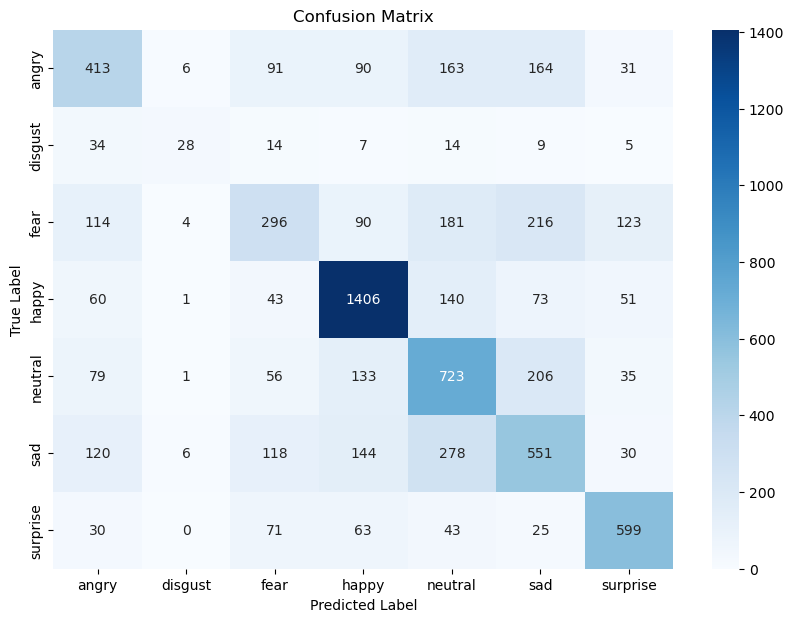

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(test_labels_encoded, predicted_classes, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# CNN Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

# Image Prediction

1/1 [==============================] - 0s 46ms/step


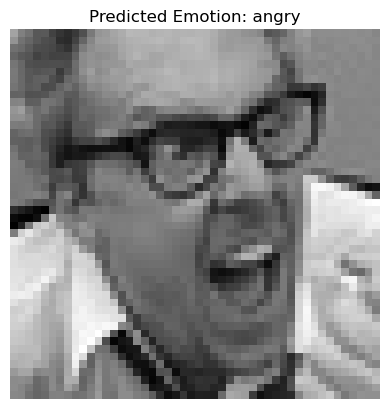

The predicted emotion is: angry


In [9]:
def predict_and_show_emotion(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (48, 48))  # Resize to match the input size of the model
    img_normalized = img_resized.astype('float32') / 255.0  # Normalize
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    img_expanded = np.expand_dims(img_expanded, axis=-1)  # Add channel dimension for grayscale images

    # Make prediction
    predictions = model.predict(img_expanded)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = label_encoder.classes_[predicted_class[0]]

    # Display the image with the predicted emotion
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f'Predicted Emotion: {predicted_label}')
    plt.axis('off')  # Hide the axis
    plt.show()

    return predicted_label

# Predict emotion for a new image and show it
image_path = 'C:\\Users\\LENOVO\\Documents\\FER-2013\\train\\angry\\Training_3908.jpg'
predicted_emotion = predict_and_show_emotion(image_path)
print(f'The predicted emotion is: {predicted_emotion}')


1/1 [==============================] - 0s 86ms/step


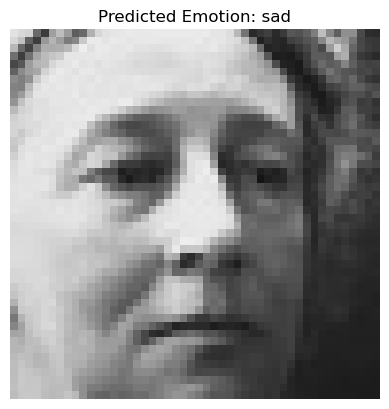

The predicted emotion is: sad


In [10]:
def predict_and_show_emotion(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (48, 48))  # Resize to match the input size of the model
    img_normalized = img_resized.astype('float32') / 255.0  # Normalize
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    img_expanded = np.expand_dims(img_expanded, axis=-1)  # Add channel dimension for grayscale images

    # Make prediction
    predictions = model.predict(img_expanded)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = label_encoder.classes_[predicted_class[0]]

    # Display the image with the predicted emotion
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.title(f'Predicted Emotion: {predicted_label}')
    plt.axis('off')  # Hide the axis
    plt.show()

    return predicted_label

# Predict emotion for a new image and show it
image_path = 'C:\\Users\\LENOVO\\Documents\\FER-2013\\train\\sad\\Training_2913.jpg'
predicted_emotion = predict_and_show_emotion(image_path)
print(f'The predicted emotion is: {predicted_emotion}')


# Learning Curve

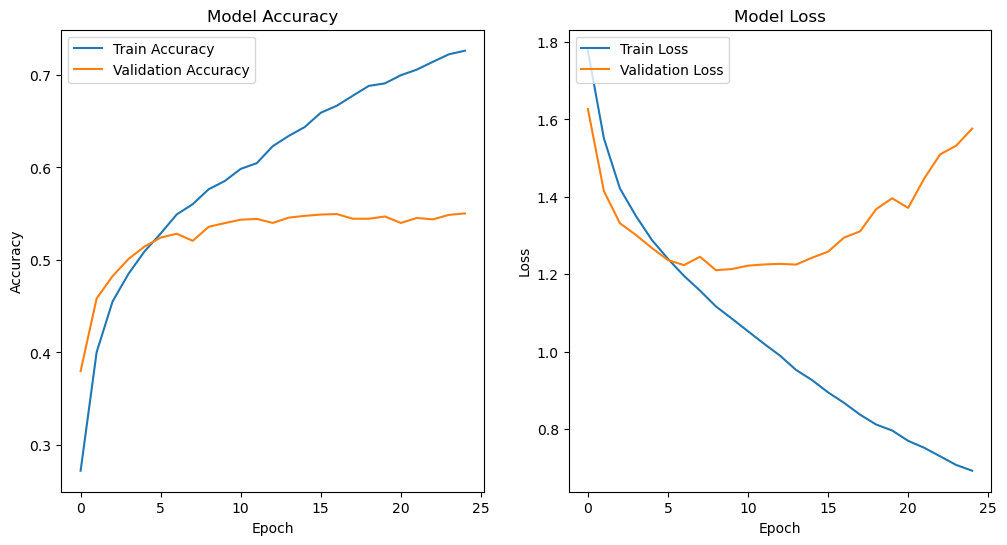

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Real-Time Video 

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('emotion_recognition_model.h5')

# Assuming you have already defined and fit a LabelEncoder as before
label_encoder = LabelEncoder()
label_encoder.fit(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])  # Example classes

# Function to preprocess the image for the model
def preprocess_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_resized = cv2.resize(img_gray, (48, 48))  # Resize to 48x48
    img_normalized = img_resized.astype('float32') / 255.0  # Normalize
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    img_expanded = np.expand_dims(img_expanded, axis=-1)  # Add channel dimension for grayscale images
    return img_expanded

# Function to display the prediction on the image
def display_prediction(frame, label, x, y, w, h):
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Start video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Use Haar Cascade to detect faces
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the region of interest (face) from the frame
        face = frame[y:y + h, x:x + w]
        preprocessed_face = preprocess_image(face)

        # Predict the emotion
        prediction = model.predict(preprocessed_face)
        predicted_class = np.argmax(prediction)
        predicted_label = label_encoder.classes_[predicted_class]

        # Display the prediction on the frame
        display_prediction(frame, predicted_label, x, y, w, h)

    # Display the resulting frame
    cv2.imshow('Real-Time Facial Emotion Recognition', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 109ms/step
